# 120 Years of Olympic History

### Olypmic Games are arguably the biggest Sporting Event in the world. Inspired by the ancient Olympic Games of the Greek, they provide an extremely competitive platform for nations to showcase their sporting talents. Using the data provided, we will try to extract some interesting facts...

### We will try to analyze the following aspects:

* Olympics Timeline
* Gender & Biometric Analysis
* Host Nation Performance
* Dominance in Sports
* Miscellaneous Facts

#### Scroll through the various visualizations and enjoy the beauty of the Olypmics!

In [1]:
import numpy as np
import pandas as pd

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
from pylab import rcParams
def style(sty):
    plt.style.use(sty)
style('seaborn')
def figure(b,l):
    rcParams['figure.figsize']=(b,l)

# Other Modules
import os
import re
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data
data=pd.read_csv('../input/athlete_events.csv')
noc_data=pd.read_csv('../input/noc_regions.csv')

# Preprocessing Data
gender_map={'M':0,'F':1}
data['IsFemale']=data['Sex'].map(gender_map)
#data.drop('Sex',axis=1,inplace=True)

def extract_year(val):
    year=val[:val.index(' ')]
    year=int(year)
    return year

def extract_season(val):
    season=val[val.index(' ')+1:]
    return season

data['Year']=data['Games'].apply(extract_year)
data['Season']=data['Games'].apply(extract_season)
data.drop('Games',axis=1,inplace=True)

data['Medal']=data['Medal'].fillna('None')
medal_dummies=pd.get_dummies(data['Medal'],prefix='Medal')
data=pd.concat([data,medal_dummies],axis=1)
data=data.drop('Medal',axis=1)

#for col in ['Age','Height','Weight']:
#    data[col]=data[col].fillna('NA')

event_data=[]
for ind,row in data.iterrows():
    event_data.append(re.sub(row['Sport'],'',row['Event'],count=1)[1:])
data['Event']=pd.Series(event_data,index=data.index)

print("Data Sample")
data.head()

Data Sample


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,IsFemale,Medal_Bronze,Medal_Gold,Medal_None,Medal_Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Men's Basketball,0,0,0,1,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Men's Extra-Lightweight,0,0,0,1,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Men's Football,0,0,0,1,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,0,0,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Women's 500 metres,1,0,0,1,0


# Olympics Timeline

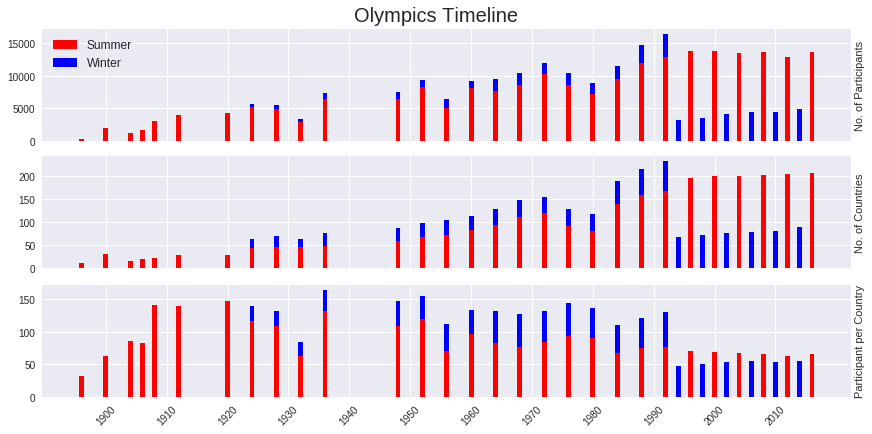

In [3]:
season_year_data=data.groupby(['Year','Season'])['ID'].aggregate('count').reset_index()

summer_years=season_year_data[season_year_data['Season']=='Summer'][['Year','ID']]
winter_years=season_year_data[season_year_data['Season']=='Winter'][['Year','ID']]

min_year=min(season_year_data['Year'])
max_year=max(season_year_data['Year'])
years=np.arange(min_year,max_year+1)
some_years=[x for x in enumerate(years) if x[1]%10==0]

summer_cnt=np.zeros(len(years));summer_countries=np.zeros(len(years))
winter_cnt=np.zeros(len(years));winter_countries=np.zeros(len(years))
for ind,yr in enumerate(years):
    if(yr in summer_years['Year'].values):
        summer_cnt[ind]=summer_years[summer_years['Year']==yr]['ID']
        summer_countries[ind]=data[(data['Year']==yr)&(data['Season']=='Summer')]['NOC'].nunique()
    if(yr in winter_years['Year'].values):
        winter_cnt[ind]=winter_years[winter_years['Year']==yr]['ID']
        winter_countries[ind]=data[(data['Year']==yr)&(data['Season']=='Winter')]['NOC'].nunique()

summer_cnt_per_country=np.zeros(len(years))
winter_cnt_per_country=np.zeros(len(years))
for ind,yr in enumerate(years):
    if(summer_countries[ind]!=0):
        summer_cnt_per_country[ind]=summer_cnt[ind]/summer_countries[ind]
    else:
        summer_cnt_per_country[ind]=0
    if(winter_countries[ind]!=0):
        winter_cnt_per_country[ind]=winter_cnt[ind]/winter_countries[ind]
    else:
        winter_cnt_per_country[ind]=0

figure(12,6)
fig,ax=plt.subplots(3,1,sharex=True,constrained_layout=True)
fig.suptitle("Olympics Timeline",fontsize=20)
x_axis=np.arange(len(years))

ax[0].bar(x_axis,summer_cnt,label='Summer',color='red')
ax[0].bar(x_axis,winter_cnt,bottom=summer_cnt,label='Winter',color='blue')
ax[0].legend(loc='upper left',fontsize='large')
ax[0].set_ylabel("No. of Participants")
ax[0].yaxis.set_label_position('right')
ax[0].set_xticks([])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].tick_params(bottom=False,left=False)

ax[1].bar(x_axis,summer_countries,color='red')
ax[1].bar(x_axis,winter_countries,bottom=summer_countries,color='blue')
ax[1].set_ylabel("No. of Countries")
ax[1].yaxis.set_label_position('right')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].tick_params(bottom=False,left=False)

ax[2].bar(x_axis,summer_cnt_per_country,color='red')
ax[2].bar(x_axis,winter_cnt_per_country,bottom=summer_cnt_per_country,color='blue')
ax[2].set_ylabel("Participant per Country")
ax[2].yaxis.set_label_position('right')
ax[2].set_xticks([x[0] for x in some_years])
ax[2].set_xticklabels([x[1] for x in some_years],rotation=45)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].tick_params(bottom=False,left=False)

plt.show()

We see two very distinct patterns in the timeline - the blue bars (representing the Winter Games) are stacked upon the red bars (representing the Summer Games) till around 1990 after which they are placed between two adjacent red bars. This represents a major change in the format of the Olympics. Till 1992, the Winter Games were held in the same year as the Summer Games. After 1992, the Winter Games started being held two years after the Summer Games. This is what is shown in the Olympic Timeline.

Over the years, the number of participants and countries participating has gradually increased, including a slight increase and subsequent dip between the 1960s and 1980s. Also there were no Olympics in the 1940s, because of World War II occuring during this period. Similarly, we can assume that World War I was responsible for no Olympics during the later part of the 1910s.

Also, though the number of participants and countries for Winter Games is much lesser than that of the Summer Games, the average number of participants per country slowly becomes comparable for both Games. This is encouraging for the Winter Games, indicating lesser countries but fairer representation of each country than the Summer Games.

# Gender & Biometric Analysis

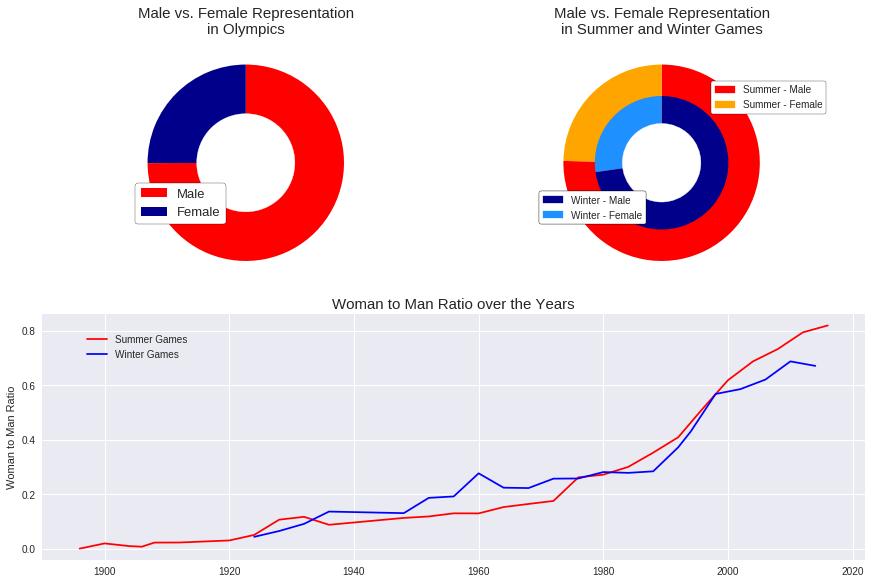

In [4]:
def extract_male_female_count(data):
    gender_data=list(data.groupby(['ID','IsFemale'])['Name'].aggregate('count').reset_index()['IsFemale'].values)
    males=gender_data.count(0)
    females=gender_data.count(1)
    return males,females

males,females=extract_male_female_count(data)
summer_data=data[data['Season']=='Summer']
winter_data=data[data['Season']=='Winter']
summer_males,summer_females=extract_male_female_count(summer_data)
winter_males,winter_females=extract_male_female_count(winter_data)

summer_women_repr=[]
summer_years=[]
winter_women_repr=[]
winter_years=[]
for ind,yr in enumerate(years):
    summer_year_data=summer_data[summer_data['Year']==yr]
    if(summer_year_data.shape[0]!=0):
        summer_yearly_gender_males,summer_yearly_gender_females=extract_male_female_count(summer_year_data)
        summer_women_repr.append(summer_yearly_gender_females/summer_yearly_gender_males)
        summer_years.append(yr)
    winter_year_data=winter_data[winter_data['Year']==yr]
    if(winter_year_data.shape[0]!=0):
        winter_yearly_gender_males,winter_yearly_gender_females=extract_male_female_count(winter_year_data)
        winter_women_repr.append(winter_yearly_gender_females/winter_yearly_gender_males)
        winter_years.append(yr)
        
figure(12,8)
fig=plt.figure(constrained_layout=True)
gs=fig.add_gridspec(2,2)
ax=[0,0,0]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,:])

circle=plt.Circle((0,0),radius=0.5,color='white')
ax[0].pie([males,females],startangle=90,colors=['red','darkblue'],counterclock=False)
ax[0].set_title("Male vs. Female Representation\nin Olympics",fontsize=15)
ax[0].legend(['Male','Female'],loc=(0.05,0.25),facecolor='w',edgecolor='black',framealpha=1,frameon=True,fontsize=13)
ax[0].add_artist(circle)

blue=['darkblue','dodgerblue']
blue_labels=['Winter - Male','Winter - Female']
red=['red','orange']
red_labels=['Summer - Male','Summer - Female']
blue_handles=[mpatches.Patch(color=blue[i],label=blue_labels[i]) for i in [0,1]]
red_handles=[mpatches.Patch(color=red[i],label=red_labels[i]) for i in [0,1]]
circle=plt.Circle((0,0),radius=0.4,color='white')
ax[1].pie([summer_males,summer_females],radius=1,counterclock=False,colors=red,startangle=90)
ax[1].pie([winter_males,winter_females],radius=0.68,counterclock=False,colors=blue,startangle=90)
ax[1].set_title("Male vs. Female Representation\nin Summer and Winter Games",fontsize=15)
legend1=ax[1].legend(handles=red_handles,loc=(0.7,0.7),facecolor='w',framealpha=1,edgecolor='black',frameon=True)
legend2=ax[1].legend(handles=blue_handles,loc=(0,0.25),facecolor='w',framealpha=1,edgecolor='black',frameon=True)
ax[1].add_artist(legend1)
ax[1].add_artist(legend2)
ax[1].add_artist(circle)

sns.lineplot(summer_years,summer_women_repr,ax=ax[2],color='red')
sns.lineplot(winter_years,winter_women_repr,ax=ax[2],color='blue')
ax[2].set_title("Woman to Man Ratio over the Years",fontsize=15)
ax[2].set_ylabel("Woman to Man Ratio")
ax[2].legend(['Summer Games','Winter Games'],loc=(0.05,0.8))
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].tick_params(bottom=False,left=False)

plt.show()

Men have largely dominated the Olympics, with about 75% participants being male. However, the female representation is slightly better in the Winter Olympics than in the Summer Olympics.

If we look at the female representation over the years, we realize that it has always stayed below 50%. But the encouraging statistic is that it is gradually increasing. Currently, for every 100 men, there are about 80 women in the Summer Games and about 60 women in the Winter Games.

Also there existed a period around the 1960s when Winter Games had an unusually high woman to man ratio. Upon some research, we realize that the 1960 Winter Games was, in fact, a very important event. It was the first to feature female speed skating events, first to have a dedicated Athlete's Village and first to tabulate results using a computer. Also the 1956 Winter Games were televised for the first time. These events might have led to a lot of publicity for the 1960 Winter Games, possibly resulting in this abnormal increase in female representation.

Not Considering Sports with less than 238 Participants...


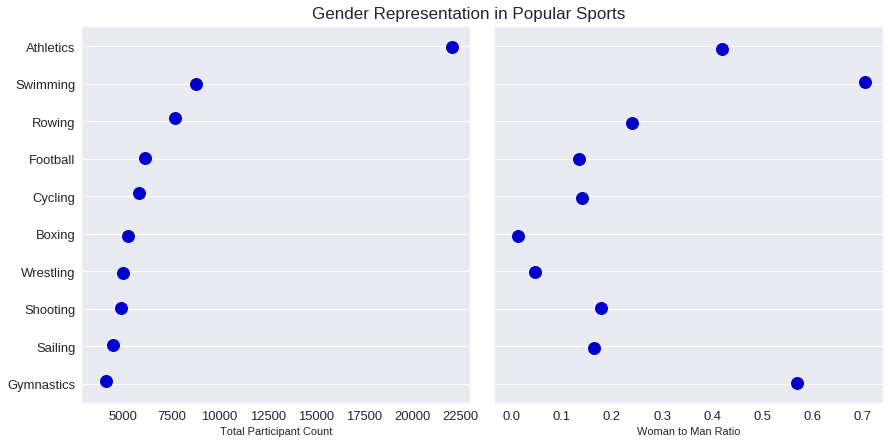

In [5]:
gender_sport_cnt={};gender_sport_female_repr={}
sports=data['Sport'].unique()
for sport in sports:
    sport_data=data[data['Sport']==sport]
    sport_male_cnt,sport_female_cnt=extract_male_female_count(sport_data)
    gender_sport_cnt[sport]=sport_female_cnt+sport_male_cnt
    if(sport_male_cnt!=0):
        gender_sport_female_repr[sport]=sport_female_cnt/sport_male_cnt
    else:
        gender_sport_female_repr[sport]=1000

sports_cnt=pd.Series(list(gender_sport_cnt.values()))
threshold=np.round(np.percentile(sports_cnt,25))
print("Not Considering Sports with less than {thr} Participants...".format(thr=int(threshold)))
for sport in sports:
    if(gender_sport_cnt[sport]<threshold):
        gender_sport_cnt.pop(sport)
        gender_sport_female_repr.pop(sport)
        
popular_sports=list(sorted(gender_sport_cnt.items(),key=lambda x:x[1],reverse=True)[:10])
popular_sports_stats=[]
for sport in popular_sports:
    popular_sports_stats.append((sport[0],sport[1],gender_sport_female_repr[sport[0]]))
    
popular_sports_data=pd.DataFrame.from_dict(popular_sports_stats)
popular_sports_data.columns=['Sport','Total Participant Count','Woman to Man Ratio']
g=sns.PairGrid(popular_sports_data,x_vars=['Total Participant Count','Woman to Man Ratio'],
               y_vars=['Sport'],height=6,aspect=1)
g.fig.suptitle("Gender Representation in Popular Sports",fontsize=17,va='bottom')
g.map(sns.stripplot,size=13,orient="h",color='mediumblue')
g.set(ylabel='')
for ax in g.axes.flat:
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    ax.tick_params(left=False,axis='both',labelsize=13)
sns.despine(bottom=True,left=True)
plt.show()

We can see that Athletics has an incredibly high number of participants, maybe because of the various events that occur under it. We also realize that Athletics has decent gender representation, with the female to male ratio being around 0.4. Other popular sports with extremely poor gender equality include Boxing & Wrestling. On the other hand, Gymnastics & Swimming have better gender representation than the other sports.

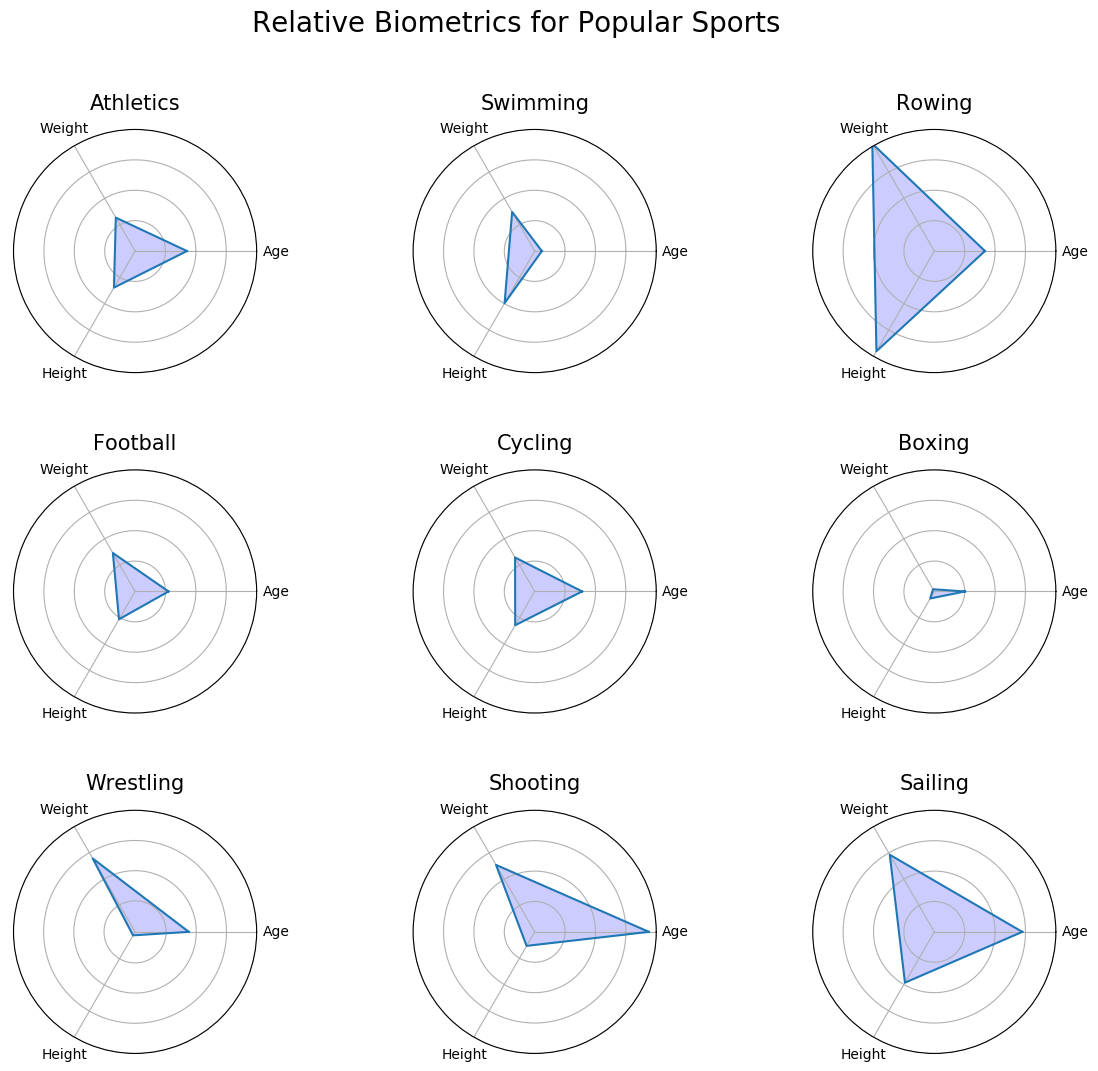

In [6]:
def extract_avg_biometrics(data):
    biometric_data=data.groupby(['ID','Age','Weight','Height'])['Name'].aggregate('count').reset_index().drop('Name',axis=1)
    biometric_data=biometric_data.dropna()
    avg_age=biometric_data['Age'].mean()
    avg_weight=biometric_data['Weight'].mean()
    avg_height=biometric_data['Height'].mean()
    return avg_age,avg_weight,avg_height

popular_sports=[x[0] for x in popular_sports[:9]]
pi=np.pi

style('default')
figure(15,12)
fig,ax=plt.subplots(3,3,subplot_kw=dict(polar=True))
fig.suptitle("Relative Biometrics for Popular Sports",fontsize=20,va='top')
plt.subplots_adjust(hspace=0.4,wspace=0.1)
avg_age_min=20;avg_age_max=33
avg_weight_min=65;avg_weight_max=80
avg_height_min=172;avg_height_max=185
for ind,sport in enumerate(popular_sports):
    sport_data=data[data['Sport']==sport]
    avg_age,avg_weight,avg_height=extract_avg_biometrics(sport_data)
    row=int(ind/3);col=int(ind%3)
    avg_age=(avg_age-avg_age_min)/(avg_age_max-avg_age_min)
    avg_weight=(avg_weight-avg_weight_min)/(avg_weight_max-avg_weight_min)
    avg_height=(avg_height-avg_height_min)/(avg_height_max-avg_height_min)
    plots=[avg_age,avg_weight,avg_height,avg_age]
    angles=[0,2*pi/3,4*pi/3,0]
    ax[row][col].plot(angles,plots)
    ax[row][col].fill(angles,plots,'blue',alpha=0.2)
    ax[row][col].set_rticks([])
    ax[row][col].set_rmax(1)
    ax[row][col].set_xticks(angles[:-1])
    ax[row][col].set_xticklabels(['Age','Weight','Height'])
    ax[row][col].set_yticks([0.25,0.5,0.75,1])
    ax[row][col].set_yticklabels([])
    ax[row][col].grid(True,axis='y')
    ax[row][col].set_title(sport,fontsize=15)
plt.show()
style('seaborn')

**NOTE**: These are **relative** biometric observations that have been plotted

We see some interesting aspects about these nine Olympic sports, like -

* Shooting & Sailing participants seem to have relatively older participants
* Rowing participants have much greater relative height and weight
* Boxing participants seem to have lesser relative age, height and weight

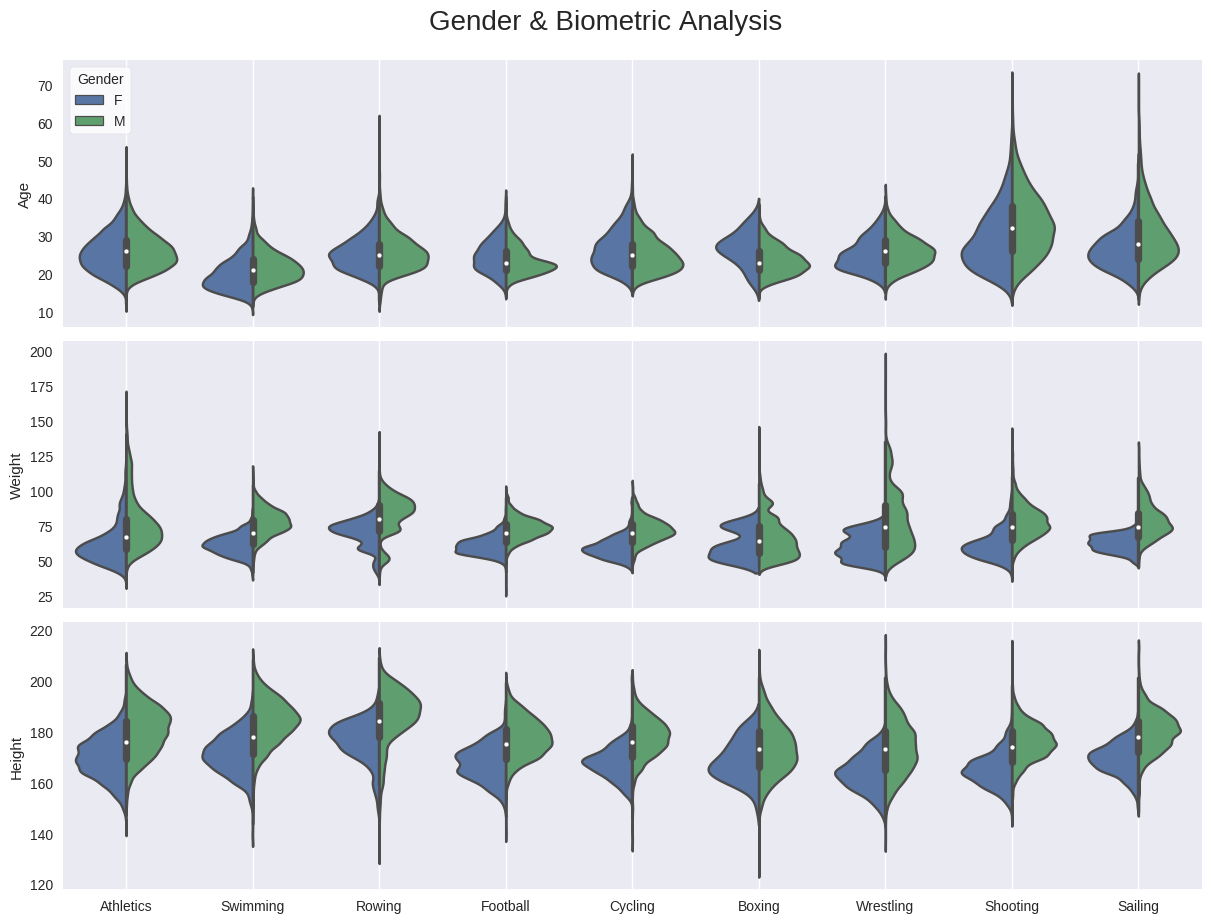

In [7]:
age_data_temp=data.groupby(['Sport','Sex','Age','Weight','Height'])['Name'].aggregate('count').reset_index().drop('Name',axis=1)
age_data=pd.DataFrame()
for sport in popular_sports:
    popular_sport_data=age_data_temp[age_data_temp['Sport']==sport]
    age_data=pd.concat([age_data,popular_sport_data])

figure(12,9)
fig,ax=plt.subplots(3,1,constrained_layout=True,sharex=True)
fig.suptitle("Gender & Biometric Analysis",fontsize=20,va='bottom')

sns.violinplot(x='Sport',y='Age',hue='Sex',data=age_data,split=True,ax=ax[0])
ax[0].grid(True,axis='x')
ax[0].grid(False,axis='y')
ax[0].legend(frameon=True,facecolor='w',title='Gender',loc='upper left')
ax[0].set_xlabel('')

sns.violinplot(x='Sport',y='Weight',hue='Sex',data=age_data,split=True,ax=ax[1])
ax[1].grid(True,axis='x')
ax[1].grid(False,axis='y')
ax[1].get_legend().remove()
ax[1].set_xlabel('')

sns.violinplot(x='Sport',y='Height',hue='Sex',data=age_data,split=True,ax=ax[2])
ax[2].grid(True,axis='x')
ax[2].grid(False,axis='y')
ax[2].get_legend().remove()
ax[2].set_xlabel('')
plt.show()

Let us now analyze the biometrics for males and females in various popular sports. We can list down some nice observations here -
* There doesn't seem to be a lot of difference in ages of males and females in these sports
* In almost all of these sports, the average weight and height of males tends to be more than that of females
* For Boxing, weight and height of male and female participants seems comparable

# Host Nation Performance

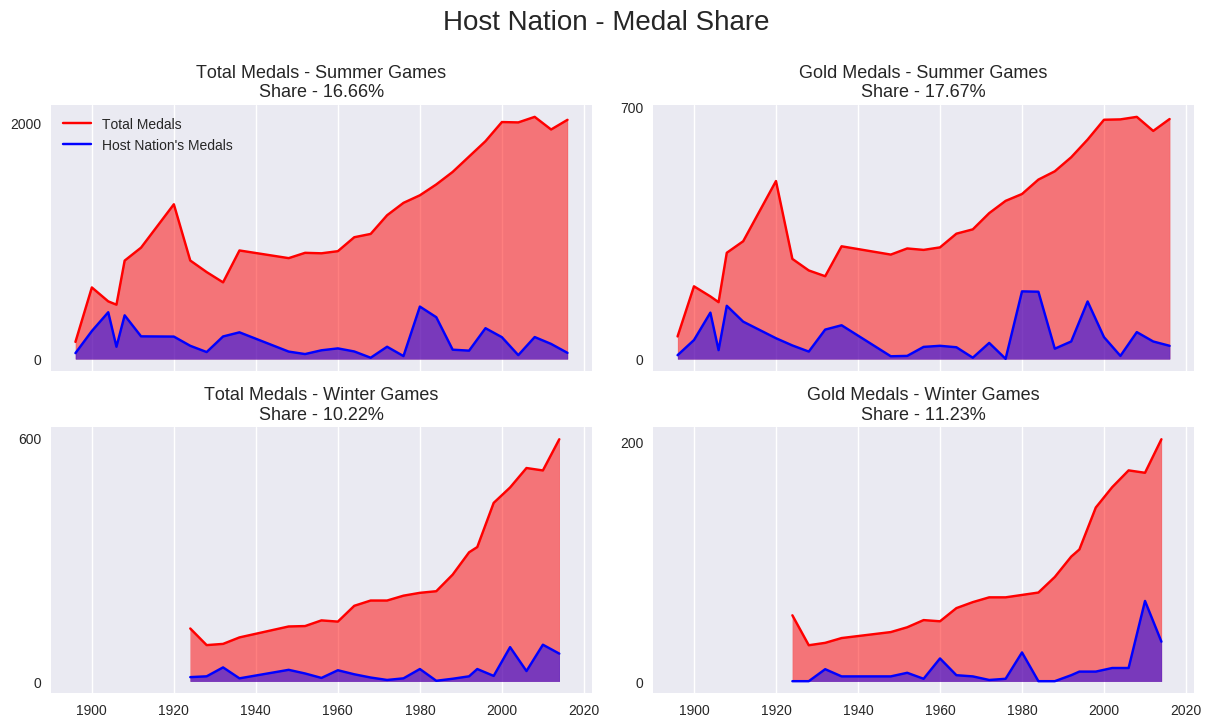

In [8]:
city_map={
(1896,'Athina'):'GRE',
(1900,'Paris'):'FRA',
(1904,'St. Louis'):'USA',
(1906,'Athina'):'GRE',
(1908,'London'):'GBR',
(1912,'Stockholm'):'SWE',
(1920,'Antwerpen'):'BEL',
(1924,'Chamonix'):'FRA',
(1924,'Paris'):'FRA',
(1928,'Amsterdam'):'NED',
(1928,'Sankt Moritz'):'SUI',
(1932,'Lake Placid'):'USA',
(1932,'Los Angeles'):'USA',
(1936,'Berlin'):'GER',
(1936,'Garmisch-Partenkirchen'):'GER',
(1948,'London'):'GBR',
(1948,'Sankt Moritz'):'SUI',
(1952,'Helsinki'):'FIN',
(1952,'Oslo'):'NOR',
(1956,"Cortina d'Ampezzo"):'ITA',
(1956,'Melbourne'):'AUS',
(1956,'Stockholm'):'SWE',
(1960,'Roma'):'ITA',
(1960,'Squaw Valley'):'USA',
(1964,'Innsbruck'):'AUT',
(1964,'Tokyo'):'JPN',
(1968,'Grenoble'):'FRA',
(1968,'Mexico City'):'MEX',
(1972,'Munich'):'FRG',
(1972,'Sapporo'):'JPN',
(1976,'Innsbruck'):'AUT',
(1976,'Montreal'):'CAN',
(1980,'Lake Placid'):'USA',
(1980,'Moskva'):'URS',
(1984,'Los Angeles'):'USA',
(1984,'Sarajevo'):'YUG',
(1988,'Calgary'):'CAN',
(1988,'Seoul'):'KOR',
(1992,'Albertville'):'FRA',
(1992,'Barcelona'):'ESP',
(1994,'Lillehammer'):'NOR',
(1996,'Atlanta'):'USA',
(1998,'Nagano'):'JPN',
(2000,'Sydney'):'AUS',
(2002,'Salt Lake City'):'USA',
(2004,'Athina'):'GRE',
(2006,'Torino'):'ITA',
(2008,'Beijing'):'CHN',
(2010,'Vancouver'):'CAN',
(2012,'London'):'GBR',
(2014,'Sochi'):'RUS',
(2016,'Rio de Janeiro'):'BRA'
}

host_years=[];host_city=[];host_NOC=[]
for key in city_map:
    host_years.append(key[0])
    host_city.append(key[1])
    host_NOC.append(city_map[key])
host_NOC=pd.DataFrame.from_dict({'Year':host_years,'City':host_city,'Host_NOC':host_NOC})
data=data.join(host_NOC.set_index(['Year','City']),on=['Year','City'])
data['Is_Host']=pd.Series(data['NOC']==data['Host_NOC'],index=data.index)
data['Is_Host']=data['Is_Host'].map({True:1,False:0})

def extract_medal_tally(data):
    medal_data=data.groupby(['Year','City','Host_NOC','NOC'])[['Medal_Gold','Medal_Silver','Medal_Bronze']].aggregate('sum').reset_index()
    total_data=medal_data.groupby(['Year'])[['Medal_Gold','Medal_Silver','Medal_Bronze']].aggregate('sum').reset_index()
    host_data=medal_data[medal_data['Host_NOC']==medal_data['NOC']]
    host_data=host_data.groupby(['Year'])[['Medal_Gold','Medal_Silver','Medal_Bronze']].aggregate('sum').reset_index()
    host_data['Total_Medals']=host_data.apply(lambda x:x['Medal_Gold']+x['Medal_Silver']+x['Medal_Bronze'],axis=1)
    total_data['Total_Medals']=total_data.apply(lambda x:x['Medal_Gold']+x['Medal_Silver']+x['Medal_Bronze'],axis=1)
    return total_data,host_data

summer_data=data[data['Season']=='Summer'].reset_index(drop=True)
summer_total_data,summer_host_data=extract_medal_tally(summer_data)

winter_data=data[data['Season']=='Winter'].reset_index(drop=True)
winter_total_data,winter_host_data=extract_medal_tally(winter_data)

figure(12,7)
fig,ax=plt.subplots(2,2,constrained_layout=True,sharex=True)
fig.suptitle("Host Nation - Medal Share",fontsize=20,va='bottom')

datas=[
    (summer_total_data['Total_Medals'],summer_host_data['Total_Medals']),
    (summer_total_data['Medal_Gold'],summer_host_data['Medal_Gold']),
    (winter_total_data['Total_Medals'],winter_host_data['Total_Medals']),
    (winter_total_data['Medal_Gold'],winter_host_data['Medal_Gold'])
]

titles=[
    'Total Medals - Summer Games',
    'Gold Medals - Summer Games',
    'Total Medals - Winter Games',
    'Gold Medals - Winter Games'
]

ticks=[2000,700,600,200]

summer_years=summer_total_data['Year']
winter_years=winter_total_data['Year']
years=[summer_years,summer_years,winter_years,winter_years]

for index in np.arange(4):
    row=int(index/2);col=int(index%2)
    ax[row,col].plot(years[index],datas[index][0],color='red',label='Total Medals')
    ax[row,col].plot(years[index],datas[index][1],color='blue',label="Host Nation's Medals")
    perc=np.divide(datas[index][1],datas[index][0])*100
    perc=np.mean(perc)
    ax[row,col].fill_between(x=years[index],y1=datas[index][0],color='red',alpha=0.5)
    ax[row,col].fill_between(x=years[index],y1=datas[index][1],color='blue',alpha=0.5)
    ax[row,col].spines['top'].set_visible(False)
    ax[row,col].spines['right'].set_visible(False)
    ax[row,col].tick_params(bottom=False,left=False)
    ax[row,col].set_title(titles[index]+"\nShare - {perc:.2f}%".format(perc=perc),fontsize=13)
    ax[row,col].yaxis.set_major_locator(ticker.MultipleLocator(ticks[index]))
    ax[row,col].yaxis.grid(False)
    if(index==0):
        ax[row,col].legend(loc='best')

plt.show()

Nations hosting the Winter Olympics seem to have a much lesser medal share than those hosting the Summer Games. Also in these graphs, the vertical distance between the red and blue lineplots indicates the host nation's medal share. More the distance, lesser the host nation's medal share. Therefore, we can also conclude that the medal share of the host nation has steadily been decreasing over the years.

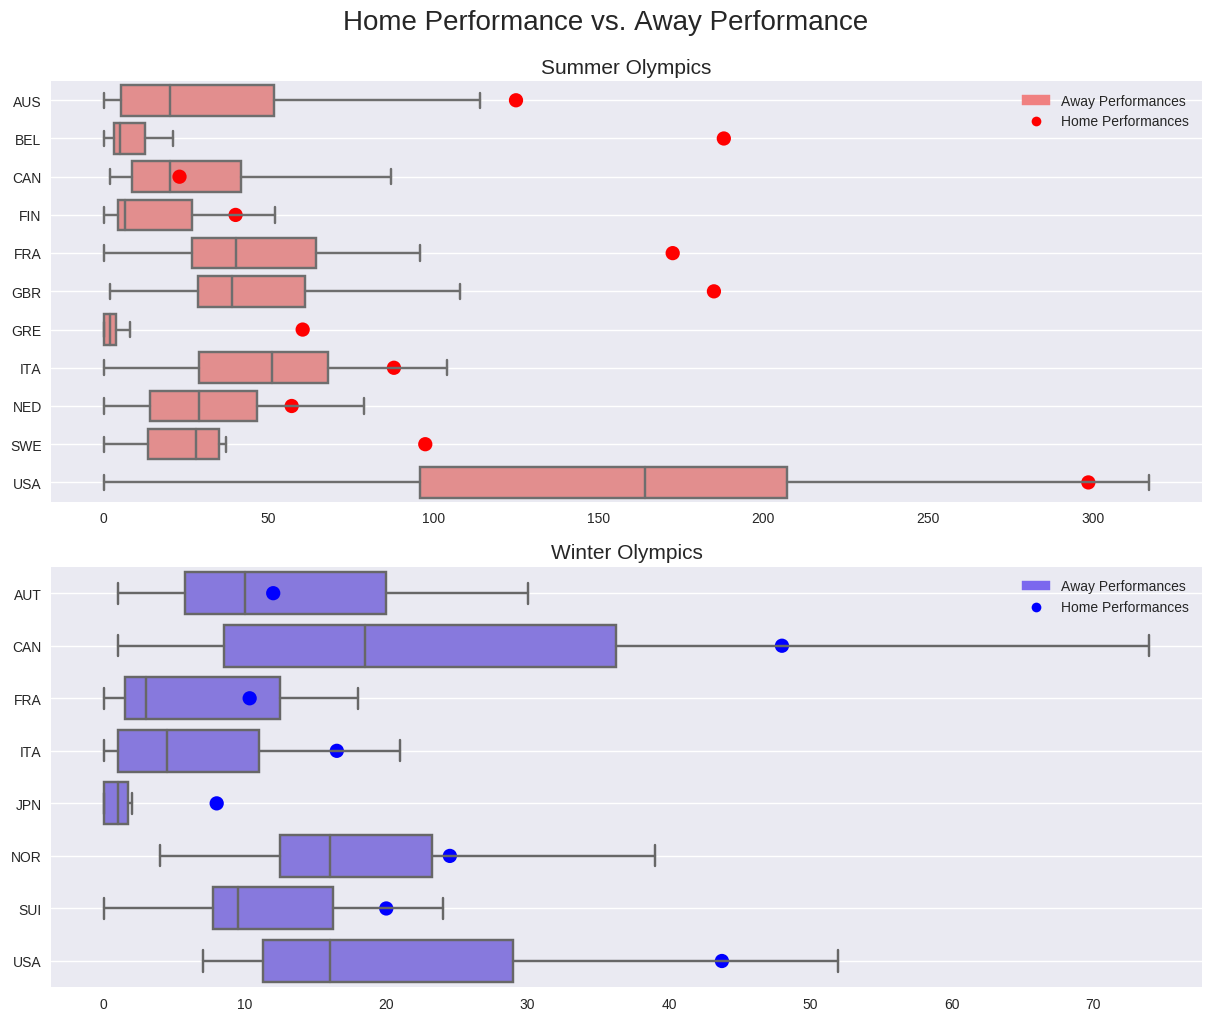

In [9]:
def extract_performance(data,country,thresh=20):
    country_data=data.groupby(['Year','Host_NOC','NOC'])[['Medal_Gold','Medal_Silver','Medal_Bronze']].aggregate('sum').reset_index()
    country_data=country_data[country_data['NOC']==country]
    if(country_data.shape[0]<thresh):
        return []
    
    home_data=country_data[country_data['Host_NOC']==country]
    home_data=home_data.assign(Total_Medals=home_data.apply(lambda x:x['Medal_Gold']+x['Medal_Silver']+x['Medal_Bronze'],axis=1))
    other_data=country_data[country_data['Host_NOC']!=country]
    other_data=other_data.assign(Total_Medals=other_data.apply(lambda x:x['Medal_Gold']+x['Medal_Silver']+x['Medal_Bronze'],axis=1))
    
    home_stats=home_data['Total_Medals'].mean()
    other_stats=other_data['Total_Medals'].values.tolist()
    return list(zip([country]*len(other_stats),[home_stats]*len(other_stats),other_stats))

def extract_country_performance(data,season,thresh=20):
    host_countries=data.groupby(['Host_NOC','Season'])['Name'].aggregate('count').reset_index().drop('Name',axis=1)
    season_data=data[data['Season']==season]
    host_country_stats=[]
    for index,row in host_countries.iterrows():
        if(row['Season']==season):
            host_country_stats.extend(extract_performance(season_data,row['Host_NOC'],thresh))
    return host_country_stats

host_nation_summer=extract_country_performance(data,'Summer',25)
host_nation_summer=pd.DataFrame(host_nation_summer,columns=['Host_NOC','Home_Stat','Other_Stats'])

host_nation_winter=extract_country_performance(data,'Winter',15)
host_nation_winter=pd.DataFrame(host_nation_winter,columns=['Host_NOC','Home_Stat','Other_Stats'])

host_nation_summer_performance=host_nation_summer.groupby(['Host_NOC','Home_Stat'])['Other_Stats'].aggregate('count').reset_index().drop('Other_Stats',axis=1)
host_nation_winter_performance=host_nation_winter.groupby(['Host_NOC','Home_Stat'])['Other_Stats'].aggregate('count').reset_index().drop('Other_Stats',axis=1)

figure(12,10)
fig,ax=plt.subplots(2,1,constrained_layout=True)
fig.suptitle("Home Performance vs. Away Performance",fontsize=20,va='bottom')

sns.catplot(x='Other_Stats',y='Host_NOC',kind='box',color='lightcoral',data=host_nation_summer,showfliers=False,orient='h',ax=ax[0])
sns.pointplot(x='Home_Stat',y='Host_NOC',data=host_nation_summer_performance,color='red',markers='o',fontsize=10,join=False,ax=ax[0])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].tick_params(bottom=False,left=False)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title("Summer Olympics",fontsize=15)
ax[0].yaxis.grid(True)
ax[0].xaxis.grid(False)
catplot_patch=mpatches.Patch(color='lightcoral',label='Away Performances')
point_patch=mlines.Line2D([],[],color='red',marker='o',label='Home Performances',linestyle='None')
ax[0].legend(handles=[catplot_patch,point_patch],loc='best')

sns.catplot(x='Other_Stats',y='Host_NOC',kind='box',color='mediumslateblue',data=host_nation_winter,showfliers=False,orient='h',ax=ax[1])
sns.pointplot(x='Home_Stat',y='Host_NOC',data=host_nation_winter_performance,color='blue',markers='o',fontsize=10,join=False,ax=ax[1])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].tick_params(bottom=False,left=False)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_title("Winter Olympics",fontsize=15)
ax[1].yaxis.grid(True)
ax[1].xaxis.grid(False)
catplot_patch=mpatches.Patch(color='mediumslateblue',label='Away Performances')
point_patch=mlines.Line2D([],[],color='blue',marker='o',label='Home Performances',linestyle='None')
ax[1].legend(handles=[catplot_patch,point_patch],loc='best')


plt.close(3)
plt.close(2)
plt.show()

**NOTE**: For the above two plots, we have considered the countries which have participated in atleast 25 Summer Games and 15 Winter Games respectively

The following boxplots give us a very good idea of a host nation's performance in the following way -
* If the dot is within the corresponding box, then the home performances are comparable to the away performances
* If the dot is outside the box but within the whiskers, then the home performances are slightly better than the away performances
* If the dot is outside the whiskers, then the home performances are much better than the away performances

Thus, we realize that in case of the Summer Games, there are a few nations which have performed incredibly well at home like Belgium, France, Sweden & Great Britain while Canada seems to have no difference in their home & away performances.

On the other hand, there seems to be lesser improvement in performances for nations hosting the Winter Games, with only Japan having benefitted well. However, one important aspect that is common for both Summer & Winter Games is that almost all hosting countries have improved their performances in their respective hosted competitions.

# Dominance in Sporting Events

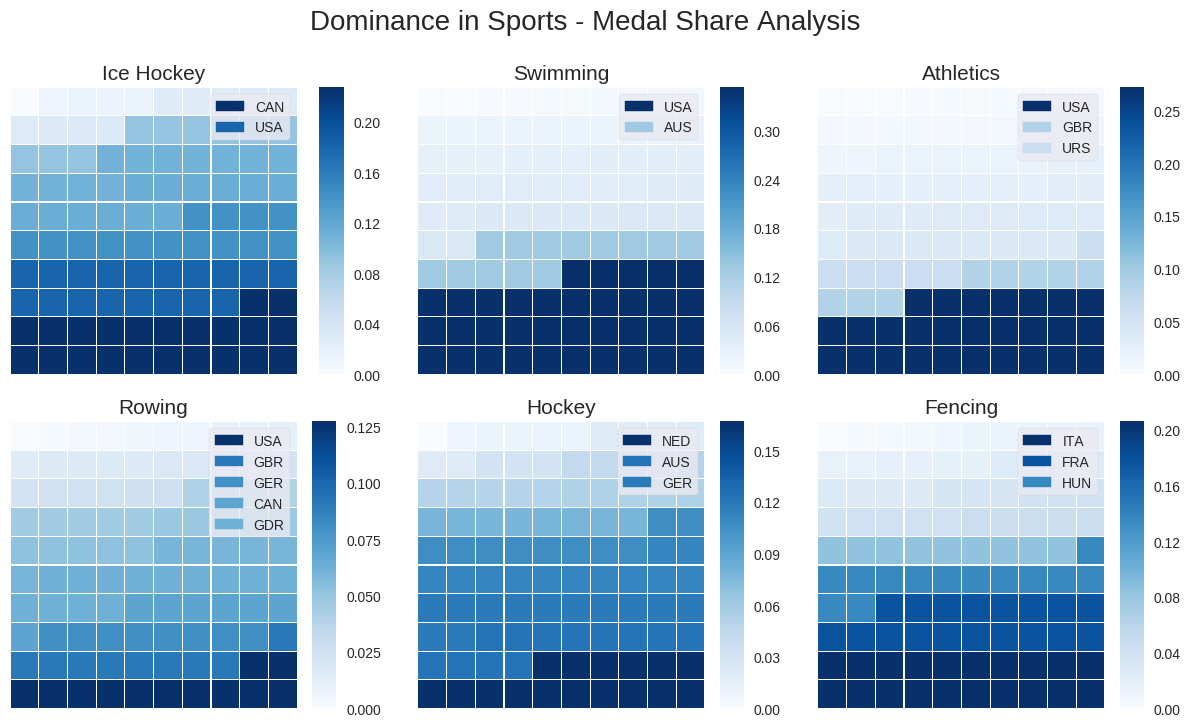

In [10]:
def extract_sport_dominance(sports_data,sport):
    sport_data=sports_data[sports_data['Sport']==sport].sort_values(by='Total_Medals',ascending=False)
    #print(sport_data.head(10))
    sport_stats=sport_data['Total_Medals'].values.tolist()
    sport_total=sum(sport_stats)
    sport_noncum_perc=np.array(sport_stats)/sport_total
    sport_perc=np.cumsum(sport_noncum_perc)
    half_perc=np.ones(sport_perc.shape[0])*0.4
    half_perc_index=list(np.greater_equal(sport_perc,half_perc)).index(True)+1
    bins=np.arange(0.01,1.01,0.01)
    indices=np.digitize(bins,sport_perc,right=False)
    sport_perc=np.append([0],sport_perc)
    sport_perc=np.append(sport_perc,[1])
    vals=np.flip(np.array([sport_perc[x+1]-sport_perc[x] for x in indices]))
    vals=vals.reshape((10,10))
    imp_sports=sport_data['NOC'].values.tolist()[:half_perc_index]
    imp_perc=sport_noncum_perc[:half_perc_index]
    return vals,imp_sports,imp_perc

sports_data=data.groupby(['Sport','NOC'])[['Medal_Gold','Medal_Silver','Medal_Bronze']].aggregate('sum').reset_index()
sports_data['Total_Medals']=sports_data.apply(lambda x:x['Medal_Gold']+x['Medal_Silver']+x['Medal_Bronze'],axis=1)

dominated=sports_data.groupby('Sport')['Total_Medals'].aggregate(['std','count']).reset_index()
dominated=dominated.dropna()
dominated=dominated[dominated['count']>25]
dominated_sports=dominated.sort_values(by='std',ascending=False)['Sport'].head(6).values.tolist()

figure(12,7)
fig,ax=plt.subplots(2,3,constrained_layout=True)
fig.suptitle("Dominance in Sports - Medal Share Analysis",fontsize=20,va='bottom')
cmap=cm.get_cmap('Blues')
for index,sport in enumerate(dominated_sports):
    row=int(index/3);col=int(index%3)
    sport_dominance,imp_sports,imp_perc=extract_sport_dominance(sports_data,sport)
    sns.heatmap(sport_dominance,cmap=cmap,square=True,xticklabels=[],yticklabels=[],ax=ax[row,col],linewidth=0.1)
    imp_cnt=len(imp_perc)
    handles=[]
    for i in range(imp_cnt):
        handles.append(mpatches.Patch(color=cmap(imp_perc[i]/imp_perc[0]),label=imp_sports[i]))
    ax[row,col].set_title(sport,fontsize=15)
    ax[row,col].legend(handles=handles,frameon=True,loc='best')
plt.show()

**NOTE**: Sports with more than 25 participating countries considered only

Here, we are trying to analyze which sports have been dominated by a handful of countries. One way of doing this is by using standard deviation of the medals won by countries. Sports where a few countries have won most of the medals while others have returned empty-handed can be expected to have a higher standard deviation than those sports where medals have been uniformly won by many countries. Thus, we have a look at the top six sports with highest standard deviation in medal distribution.

Ice Hockey is the sport dominated the most by a few countries, namely Canada & USA, with these two countries winning nearly 40% of all medals. USA alone has won nearly 35% of all Swimming medals, nearly 25% of all Athletics medals and nearly 10% of all Rowing medals. Similarly, Netherlands & Italy have dominated Hockey & Fencing respectively.

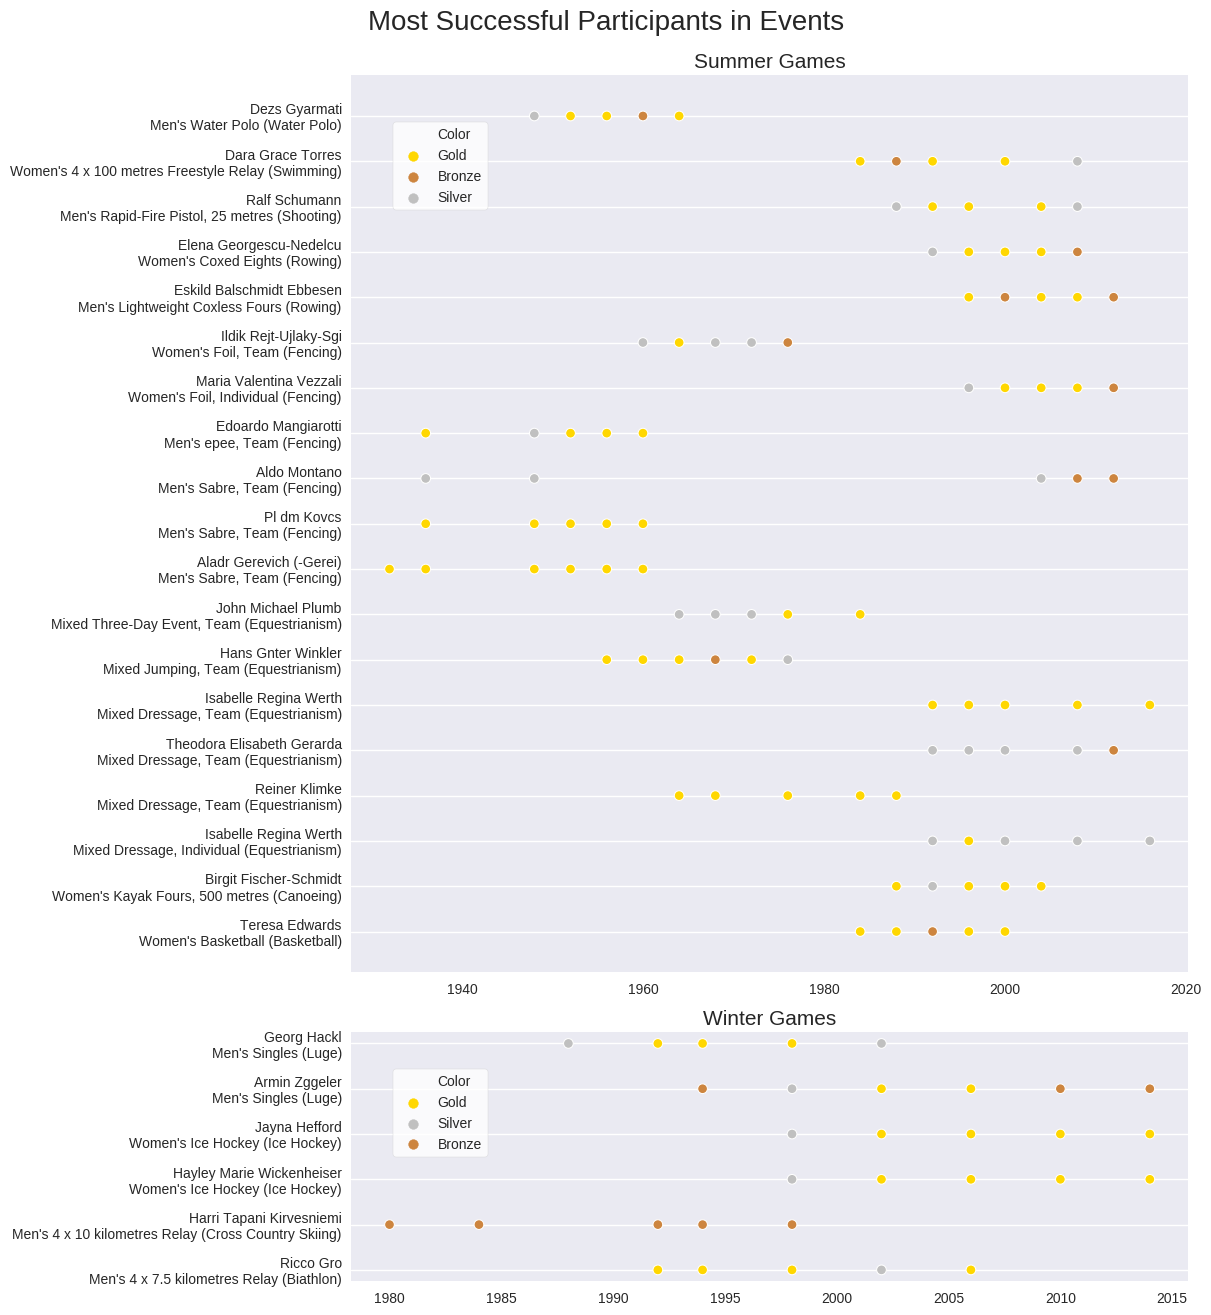

In [11]:
events=data.groupby(['Season','Sport','Event'])['Name'].aggregate('count').reset_index()
events=events[events['Name']>=300]

def shorten_name(name):
    words=name.split(' ')
    if(len(words)<=3):
        return name
    else:
        return ' '.join(words[:3])

def merge_name_event_sport(name,event,sport):
    return name+'\n'+event+' ('+sport+')'

dominant_players=[]
for ind,row in events.iterrows():
    event_data=data[(data['Season']==row['Season'])&(data['Sport']==row['Sport'])&(data['Event']==row['Event'])]
    total_years=event_data['Year'].nunique()
    event_data=event_data[event_data['Medal_None']==0]
    if(event_data.shape[0]==0):
        continue
    event_data['Total_Medals']=event_data.apply(lambda x:x['Medal_Gold']+x['Medal_Silver']+x['Medal_Bronze'],axis=1)
    event_players_data=event_data.groupby('Name')['Total_Medals'].aggregate('sum').reset_index()
    event_players_data=event_players_data[event_players_data['Total_Medals']>0]
    event_players_data=event_players_data.sort_values(by='Total_Medals',ascending=False)
    event_players_data=event_players_data[event_players_data['Total_Medals']>=5]
    players_row=[]
    for ind2,row2 in event_players_data.iterrows():
        players_row.append([row['Season'],row['Sport'],row['Event'],row2['Name'],row2['Total_Medals'],total_years])
    dominant_players.extend(players_row)
    
summer_player_plots={}
winter_player_plots={}
for player in dominant_players:
    player_data=data[(data["Name"]==player[3])&(data['Season']==player[0])&(data['Sport']==player[1])&(data['Event']==player[2])]
    player_data=player_data[player_data['Medal_None']==0]
    colors=[];years=[]
    for ind2,row2 in player_data.iterrows():
        if(row2['Medal_Gold']==1):
            colors.append('Gold')
        elif(row2['Medal_Silver']==1):
            colors.append('Silver')
        else:
            colors.append('Bronze')
    years=player_data['Year'].values.tolist()
    if(player[0]=='Summer'):
        summer_player_plots[merge_name_event_sport(shorten_name(player[3]),player[2],player[1])]={
            'Colors':colors,
            'Years':years}
    else:
        winter_player_plots[merge_name_event_sport(shorten_name(player[3]),player[2],player[1])]={
            'Colors':colors,
            'Years':years}

total_summer_player_data=pd.DataFrame(columns=['Years','Name','Color'])
for index,plot in enumerate(summer_player_plots):
    x=summer_player_plots[plot]['Years']
    num_pts=len(x)
    y=[plot]*num_pts
    colors=summer_player_plots[plot]['Colors']
    player_data=pd.DataFrame(list(zip(x,y,colors)),columns=['Years','Name','Color'])
    total_summer_player_data=pd.concat([total_summer_player_data,player_data])
    
total_winter_player_data=pd.DataFrame(columns=['Years','Name','Color'])
for index,plot in enumerate(winter_player_plots):
    x=winter_player_plots[plot]['Years']
    num_pts=len(x)
    y=[plot]*num_pts
    colors=winter_player_plots[plot]['Colors']
    player_data=pd.DataFrame(list(zip(x,y,colors)),columns=['Years','Name','Color'])
    total_winter_player_data=pd.concat([total_winter_player_data,player_data])
    
figure(12,13)
fig=plt.figure(constrained_layout=True)
gs=fig.add_gridspec(6,1)
ax=[0,0]
ax[0]=fig.add_subplot(gs[0:4])
ax[1]=fig.add_subplot(gs[4:6])
fig.suptitle("Most Successful Participants in Events",fontsize=20,va='bottom')

sns.scatterplot(
    x='Years',
    y='Name',
    hue='Color',
    palette={'Gold':'gold','Silver':'silver','Bronze':'peru'},
    data=total_summer_player_data,
    ax=ax[0])
ax[0].legend(loc=(0.05,0.85),frameon=True,facecolor='w')
ax[0].xaxis.grid(False)
ax[0].set_title("Summer Games",fontsize=15)
ax[0].set_ylabel('')
ax[0].set_xlabel('')

sns.scatterplot(
    x='Years',
    y='Name',
    hue='Color',
    palette={'Gold':'gold','Silver':'silver','Bronze':'peru'},
    data=total_winter_player_data,
    ax=ax[1])
ax[1].legend(frameon=True,loc=(0.05,0.5),facecolor='w')
ax[1].xaxis.grid(False)
ax[1].set_title("Winter Games",fontsize=15)
ax[1].set_ylabel('')
ax[1].set_xlabel('')

plt.show()

**NOTE**: Events with more than 300 participants only considered

We look at participants that have won 5 or more medals in a particular sporting event. We can safely assume that an event occurs only once in a given Olympic competition. Thus, a person who has won 5 or more medals in an event has consistently been performing at the highest level for around 15-20 years. Also, if the given player has consistently won Gold in an Event, it is justified to say he has dominated the Event.

There are around 25 players who have dominated Events in the Summer & Winter Olympics. Out of these, around 4 have always won Gold in their Event. Incredibly, Aladr Gerevich has won six Golds in the Team Event of Men's Sabre in the sport of Fencing. What is more incredible is that these Gold Medals were won over a span of around 40 years, on either side of the World War II!

It might surprise to see a particular statistic about Aldo Montano. It seems he won a Silver in the 1948 Games and returned in 2004 with a Silver! However, upon some research, it is revealed that Aldo Montana actually has a grandfather, by the same, who won the medals of the 1940s. Thus, due to the same name, the plot wrongly indicates Aldo Montano making a comeback after 56 years!

This plot might be missing the names of quite a few expected Olympic Superstars like Usain Bolt, Michael Phelps, etc. However, it is worth knowing that Usain Bolt won medals in only three Olympics while Michael Phelps won medals in four Olympics. This justifies their exclusion from this plot, however it does not signify they are not world-class athletes in their respective events.

# Miscellaneous Facts

In [12]:
print("One-Olympic Sports -\n")
index=1
for sport in data['Sport'].unique():
    sport_data=data[data['Sport']==sport]
    if(sport_data['Year'].nunique()==1):
        print("{index}. {name} ({year})".format(index=index,name=sport,year=sport_data['Year'].unique()[0]))
        index+=1

One-Olympic Sports -

1. Rugby Sevens (2016)
2. Cricket (1900)
3. Racquets (1908)
4. Motorboating (1908)
5. Military Ski Patrol (1924)
6. Croquet (1900)
7. Jeu De Paume (1908)
8. Roque (1904)
9. Basque Pelota (1900)
10. Aeronautics (1936)


There are 10 Olympic Sports which have featured in just one Olympic Game. Rugby Sevens is the newest Game in Olympics and thus, can be expected to feature in future Olympic Games. Cricket, being one of the most popular sports in the world, has only featured in the 1900 Olympics. It is also interesting to find Aeronautics as an Olympic sport!

In [13]:
print("Newest Nations -\n")
index=1
for noc in data['NOC'].unique():
    noc_data=data[data['NOC']==noc]
    if(noc_data['Year'].min()>=2000):
        print("{index}. {name} ({year})".format(index=index,name=noc,year=noc_data['Year'].unique()[0]))
        index+=1

Newest Nations -

1. ERI (2008)
2. PLW (2000)
3. TLS (2004)
4. ROT (2016)
5. FSM (2016)
6. MNE (2012)
7. MHL (2016)
8. KIR (2012)
9. TUV (2008)
10. KOS (2016)
11. SSD (2016)


There have been eleven new nations participating in the Olympics since the 2000s. In order, these are Eritrea, Palau, East Timor, Refugee Olympic Team, Federated States of Micronesia, Montenegro, Marshall Islands, Kiribati, Tuvalu, Kosovo and South Sudan.

In [14]:
non_gold=data.groupby('Name')[['Medal_Gold','Medal_Silver','Medal_Bronze']].aggregate('sum').reset_index()
non_gold=non_gold[non_gold['Medal_Gold']==0]
non_gold['Total_Medals']=non_gold.apply(lambda x:x['Medal_Silver']+x['Medal_Bronze'],axis=1)
non_gold=non_gold.sort_values(by='Total_Medals',ascending=False).head(5)
non_gold=non_gold.drop('Medal_Gold',axis=1).reset_index(drop=True)
print("5 Most Decorated Athletes without a Gold\n")
for ind,row in non_gold.iterrows():
    player_data=data[data['Name']==row['Name']]
    min_year=player_data['Year'].min()
    max_year=player_data['Year'].max()
    sport=player_data['Sport'].unique()[0]
    if(max_year!=2016):
        career=str(min_year)+'-'+str(max_year)
    else:
        career=str(min_year)+'-?'
    print("{index}. {name} - {sport} ({career})\nTotal Medals - {tot} : {silver} Silver & {bronze} Bronze\n".format(
        index=ind+1,
        name=row['Name'],
        sport=sport,
        career=career,
        tot=row['Total_Medals'],
        silver=row['Medal_Silver'],
        bronze=row['Medal_Bronze']))

5 Most Decorated Athletes without a Gold

1. Franziska van Almsick - Swimming (1992-2004)
Total Medals - 10 : 4 Silver & 6 Bronze

2. Merlene Joyce Ottey-Page - Athletics (1980-2004)
Total Medals - 9 : 3 Silver & 6 Bronze

3. Piero D'Inzeo - Equestrianism (1948-1976)
Total Medals - 6 : 2 Silver & 4 Bronze

4. Francis Joseph Edmund "Frank" De Beaurepaire - Swimming (1908-1924)
Total Medals - 6 : 3 Silver & 3 Bronze

5. Roald Morel Larsen - Speed Skating (1924-1928)
Total Medals - 6 : 2 Silver & 4 Bronze



We end the analysis with a nice statistic - the most decorated athletes in Olympics who have never won a Gold Medal. We realize that this distinction goes to Franziska van Almsick who has won an incredible 10 Olympic Medals, without any of them being Golden in color.

# Conclusion

## Hope you enjoyed the analysis!